In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from mp2 import get_data, get_close_data, get_close_df, offset_and_rolling_lag_corr, fit_sinusoid_to_correlation, fitted_sine_directional_acc, high_corr_perc

# Reading the database file

In [2]:
database = pd.read_csv("Lagged Rolling Correlation Dataset.csv")

## General Functions for Analysis

In [3]:
def plot_corr_and_sine(idx, database):
    """
    Takes in row idx. Plots correlation graph with fitted sine.
    """
    data_row = database.loc[idx]
    indep_close = get_close_data(data_row["Independent Variable"])
    dep_close = get_close_data(data_row["Dependent Variable"])
    correlation = offset_and_rolling_lag_corr(indep_close, dep_close, data_row["Offset Lag"], data_row["Rolling Lag"])
    fit_res = fit_sinusoid_to_correlation(correlation)
    tt = np.arange(0, len(correlation), 1)
    
    plt.figure(figsize=(16,8))
    plt.title("{}'s correlation with current day {}: offset lag of {} and rolling lag {}".format(data_row["Dependent Variable"],
                                                                                    data_row["Independent Variable"],
                                                                                    data_row["Offset Lag"],
                                                                                    data_row["Rolling Lag"]), 
                                                                                    fontsize=18)
    plt.plot(correlation.values, label="Lagged Rolling Point Correlation")
    plt.plot(fit_res["fitfunc"](tt), label="Fitted Sinewave (Period={})".format(data_row["Periodicity"]))
    plt.legend()
    plt.grid()    
    plt.show()
    
    
def plot_normalised(list_of_var):
    """
    Takes list of numpy array or pandas series and plots a normalised chart
    """
    plt.figure(figsize=(16,8))
    
    for var in list_of_var:
        plt.plot(minmax_scale(var))
        
    plt.grid()    
    plt.show()

In [4]:
database.sort_values(by='High Correlation Percentage', ascending=False).head(30)

,Unnamed: 0,Independent Variable,Dependent Variable,Offset Lag,Rolling Lag,Threshold,Periodicity,Directional Accuracy,High Correlation Percentage
612848,612848,OMG-USD,OMG-USD,2,29,0.7,56,0.597015,0.750000
589300,589300,OMG-USD,OMG-USD,2,28,0.7,56,0.598214,0.744807
565752,565752,OMG-USD,OMG-USD,2,27,0.7,56,0.578635,0.727811
542204,542204,OMG-USD,OMG-USD,2,26,0.7,56,0.600592,0.707965
612278,612278,ETH-USD,ETH-USD,2,29,0.7,42,0.653731,0.705357
612698,612698,VET-USD,VET-USD,2,29,0.7,43,0.659701,0.696429
612908,612908,EGLD-USD,EGLD-USD,2,29,0.7,111,0.573134,0.690476
588730,588730,ETH-USD,ETH-USD,2,28,0.7,42,0.633929,0.688427
589360,589360,EGLD-USD,EGLD-USD,2,28,0.7,111,0.562500,0.676558
589150,589150,VET-USD,VET-USD,2,28,0.7,43,0.625000,0.676558


In [32]:
data_row = database.loc[612848]
indep_close = get_close_data(data_row["Independent Variable"])
dep_close = get_close_data(data_row["Dependent Variable"])
correlation = offset_and_rolling_lag_corr(indep_close, dep_close, data_row["Offset Lag"], data_row["Rolling Lag"])

correlation

Date
2020-12-06    0.552124
2020-12-07    0.528323
2020-12-08    0.458250
2020-12-09    0.414310
2020-12-10    0.452495
                ...   
2021-11-02    0.298716
2021-11-03    0.158652
2021-11-04    0.240393
2021-11-05    0.346488
2021-11-06    0.421420
Name: OMG-USD, Length: 336, dtype: float64

# How to cut this data meaningfully?
- Experiment 1: for each independent variable/dependent variable combination- get the top 'k' high correlation/directional accuracy variable sets

- Statistical Tests
    - Build 1st function: Create gen_analysis_df with a sequence of market variables for all the rows/subset of rows of database
    - This dataframe contains the rolling lagged correlation, fitted sine, alongside market variables of interest
    - Build 2nd function: Cut that dataframe according to the hypothesis you are testing and return the subset dataframe
    - Build 3rd function: Compare the mean, median, and variance of a list of market variables and return p value and test result in a new dataframe
    
- Helper function: convert list of dataframe into 1 single dataframe - will need this for when we run multiprocess on the above

## Creating Pandas Queries
### Query 1: 
- Independent Variable is either BTC or ETH
- Independent Variable cannot equal Dependent Variable (no autocorrelation cases)
- High correlation % must be greater than 0.35 (tendency to have strong correlations so future trends can be discerned)
- Direction accuracy must be greater than 0.7 (periodic predictability)

In [6]:
sort_order = "Directional Accuracy"
high_corr_thresh = 0.2
dir_acc_thresh = 0.7
indep_variables = ["BTC-USD", "ETH-USD", "ADA-USD", "XRP-USD", "BCH-USD", "LTC-USD"] # if you want all set equal to database["Independent Variables"].unique()

q1_df = database[
            ((database["Independent Variable"].isin(indep_variables))) &
            (database["Independent Variable"] != database["Dependent Variable"]) & # removing autocorrelation cases
            (database["Offset Lag"] >= database["Rolling Lag"]) & # ensuring no overlap between correlated points
            (database["High Correlation Percentage"] > high_corr_thresh) & # high correlation threshold
            (database["Directional Accuracy"] > dir_acc_thresh) # directional accuracy threshold
            ].sort_values(by=sort_order, ascending=False) # sorting by directional accuracy - most period

display(q1_df)

,Unnamed: 0,Independent Variable,Dependent Variable,Offset Lag,Rolling Lag,Threshold,Periodicity,Directional Accuracy,High Correlation Percentage
634962,634962,BTC-USD,BNB-USD,29,29,0.7,34,0.772727,0.262136
610573,610573,BTC-USD,BNB-USD,28,28,0.7,34,0.764516,0.244373
563477,563477,BTC-USD,BNB-USD,28,26,0.7,34,0.762821,0.239617
491992,491992,BTC-USD,BNB-USD,27,23,0.7,34,0.759494,0.205047
611414,611414,BTC-USD,BNB-USD,29,28,0.7,34,0.757282,0.264516
587025,587025,BTC-USD,BNB-USD,28,27,0.7,34,0.755627,0.246795
516381,516381,BTC-USD,BNB-USD,28,24,0.7,34,0.754777,0.238095
587866,587866,BTC-USD,BNB-USD,29,27,0.7,34,0.748387,0.270096
586199,586199,BTC-USD,EGLD-USD,27,27,0.7,35,0.743590,0.204473
539929,539929,BTC-USD,BNB-USD,28,25,0.7,34,0.741214,0.232484


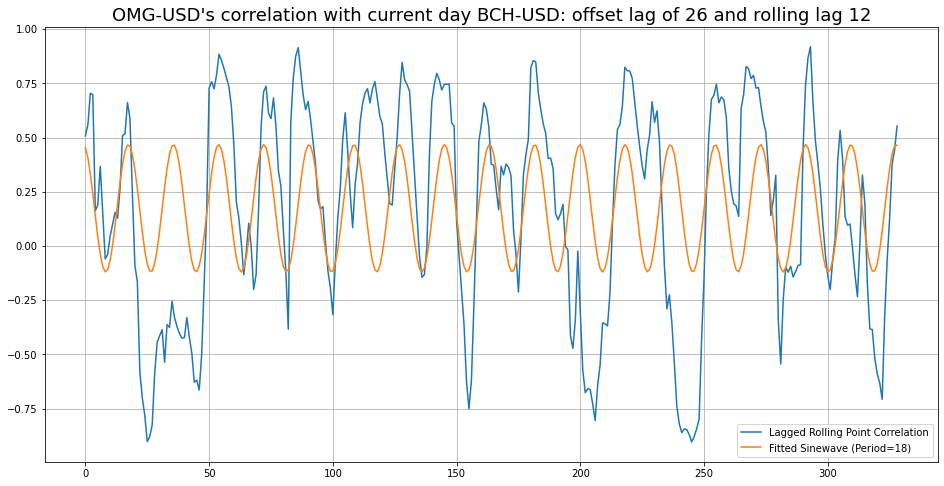

In [7]:
plot_corr_and_sine(232832, database) 

### Query 2:
- Adding conditions for:
    - rolling lag lower threshold
    - offset lag lower threshold
    - periodicity upper threshold
    - high correlation percentage lower threshold
    - directional accuracy lower threshold
    - sort order

In [9]:
rolling_lag = 3
offset_lag = 2
period_upper_thresh = 100
high_corr_thresh = 0.3
dir_acc_thresh = 0.3
k = 100
sort_order = "Directional Accuracy"

q2_df = pd.DataFrame()
names = database["Independent Variable"].unique()

for indep in names[:2]:
    for dep in names[:2]:

        tmp = database[
                 (database["Independent Variable"] != database["Dependent Variable"]) &
                 (database["Offset Lag"] >= database["Rolling Lag"]) &
                 (database["Independent Variable"] == indep) & 
                 (database["Dependent Variable"] == dep) &
                 (database["Rolling Lag"] >= rolling_lag) &
                 (database["Offset Lag" ] >= offset_lag) &
                 (database["Periodicity" ] <= period_upper_thresh) &
                 (database["High Correlation Percentage"] > high_corr_thresh) &
                 (database["Directional Accuracy"] > dir_acc_thresh)      
                 
                ].sort_values(by=sort_order, ascending=False).iloc[:k]
        
        
        q2_df = pd.concat([q2_df, tmp], axis=0)
        
        
q2_df.head()

,Unnamed: 0,Independent Variable,Dependent Variable,Offset Lag,Rolling Lag,Threshold,Periodicity,Directional Accuracy,High Correlation Percentage
42051,42051,BTC-USD,ETH-USD,24,4,0.7,5,0.609467,0.380531
18503,18503,BTC-USD,ETH-USD,24,3,0.7,5,0.607670,0.555882
21026,21026,BTC-USD,ETH-USD,27,3,0.7,4,0.601190,0.522255
38687,38687,BTC-USD,ETH-USD,20,4,0.7,7,0.599415,0.346939
63917,63917,BTC-USD,ETH-USD,22,5,0.7,11,0.598820,0.308824


In [10]:
vars_of_interest = np.unique(np.append(q1_df["Independent Variable"].unique(), (q1_df["Dependent Variable"].unique())))
closes = get_close_df(vars_of_interest)

In [11]:
data_row

Unnamed: 0                       612848
Independent Variable            OMG-USD
Dependent Variable              OMG-USD
Offset Lag                            2
Rolling Lag                          29
Threshold                           0.7
Periodicity                          56
Directional Accuracy           0.597015
High Correlation Percentage        0.75
Name: 612848, dtype: object

In [13]:
get_data("BTC-USD")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,39837841971,0,0
2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,35024953706,0,0
2020-11-08,14833.753906,15637.320312,14744.110352,15479.567383,26632075029,0,0
2020-11-09,15479.595703,15785.136719,14865.529297,15332.315430,34149115566,0,0
2020-11-10,15332.350586,15450.329102,15124.959961,15290.902344,25574938143,0,0
...,...,...,...,...,...,...,...
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,37746665647,0,0
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,36124731509,0,0
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,32615846901,0,0


In [56]:
from scipy.stats import mannwhitneyu, levene, kruskal

def mv_df(indep_name, dep_name, offset_lag, rolling_lag):
    """
    Inputs: independent variable, dependent variable, offset lag, and rolling lag
    
    Outputs: Dataframe with relevant market variables from each  
    """
    
    # construct dataframes containing independent market variables 
    df_indep = get_data(indep_name)
    df_indep["Returns"] = df_indep["Close"].pct_change()
    df_indep["1WkVol"] = df_indep["Returns"].rolling(7).std()
    
    # construct dataframes containing dependent market variables
    df_dep = get_data(dep_name)
    df_dep["Returns"] = df_dep["Close"].pct_change()
    df_dep["1WkVol"] = df_dep["Returns"].rolling(7).std()
    
    # obtaining only variables of interest
    df_indep = df_indep[["Close", "Returns", "1WkVol", "Volume"]]
    df_dep = df_dep[["Close", "Returns", "1WkVol", "Volume"]]

    # renaming columns
    df_indep.columns = ["Independent " + col for col in df_indep.columns]
    df_dep.columns = ["Dependent " + col for col in df_dep.columns]
    
    # combining the dataframes
    market_variable_df = pd.concat([df_indep, df_dep], axis=1)
    
    # obtaining index of interest 
    idx_of_interest = market_variable_df.index[rolling_lag-1:-offset_lag]
    
    # obtaining correlation with respective lags 
    correlation = offset_and_rolling_lag_corr(df_indep["Independent Close"], df_dep["Dependent Close"], offset_lag, rolling_lag)
    correlation.index = idx_of_interest
    
    # appending, renaming, and calculating and appending absolute difference of correlation to the market variable dataframe
    market_variable_df = pd.concat([market_variable_df, correlation], axis=1)
    market_variable_df = market_variable_df.rename(columns={0: "Correlation"})
    market_variable_df["CorrDiff"] = np.sign(market_variable_df["Correlation"].diff())
    market_variable_df = market_variable_df.dropna()
    
    # returning the market_variable_df
    return market_variable_df
    
def gen_test_res(test_df, analysis_df):
    test_res = []
    
    for var_to_test in test_df.columns:

        if "Corr" not in var_to_test:

            if "Close" not in var_to_test:

                _, p_mwu = mannwhitneyu(test_df[var_to_test].values, analysis_df[var_to_test])

                _, p_lev = levene(test_df[var_to_test].values, analysis_df[var_to_test])

                _, p_kw = kruskal(test_df[var_to_test].values, analysis_df[var_to_test])

                test_res.append([var_to_test, p_mwu, check_test_res(p_mwu), p_lev, check_test_res(p_lev), p_kw, check_test_res(p_kw)])

    res_df = pd.DataFrame(test_res)

    columns = ["Market Variable", "Mann Whitney U Pval", "Mann Whitney Res (Means)", "Levene Pval", "Levene Res (Variances)", "Krusal Pval", "Kruskal Res (Medians)"]

    res_df.columns = columns
    
    return res_df  

def check_test_res(p):
    if p < 0.05:
        return "Reject NH"
    
    else:
        return "Can't Reject NH"

def routine(indep_name, dep_name, offset_lag, rolling_lag):
    mvdf = mv_df(indep_name, dep_name, offset_lag, rolling_lag)
    
    subset = mvdf[
        (mvdf["CorrDiff"] == 1) &
        (abs(mvdf["Correlation"]) > 0.7)
        ]
    
    output = gen_test_res(subset, mvdf)
    
    output.insert(loc=0, column="Independent Name", value=indep_name)
    output.insert(loc=1, column="Dependent Name", value=dep_name)
    output.insert(loc=2, column="Offset Lag", value=offset_lag)
    output.insert(loc=3, column="Rolling Lag", value=rolling_lag)
    
    return output

In [57]:
routine("OMG-USD", "ETH-USD", 2, 29)

,Independent Name,Dependent Name,Offset Lag,Rolling Lag,Market Variable,Mann Whitney U Pval,Mann Whitney Res (Means),Levene Pval,Levene Res (Variances),Krusal Pval,Kruskal Res (Medians)
0,OMG-USD,ETH-USD,2,29,Independent Returns,0.739224,Can't Reject NH,0.659646,Can't Reject NH,0.738756,Can't Reject NH
1,OMG-USD,ETH-USD,2,29,Independent 1WkVol,0.000058,Reject NH,0.026604,Reject NH,0.000057,Reject NH
2,OMG-USD,ETH-USD,2,29,Independent Volume,0.002210,Reject NH,0.353983,Can't Reject NH,0.002206,Reject NH
3,OMG-USD,ETH-USD,2,29,Dependent Returns,0.835492,Can't Reject NH,0.435262,Can't Reject NH,0.835008,Can't Reject NH
4,OMG-USD,ETH-USD,2,29,Dependent 1WkVol,0.166293,Can't Reject NH,0.012310,Reject NH,0.166103,Can't Reject NH
5,OMG-USD,ETH-USD,2,29,Dependent Volume,0.000394,Reject NH,0.584691,Can't Reject NH,0.000393,Reject NH
